# Import Libraries

In [2]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE



In [4]:
cd ..

c:\Users\Lenovo\Desktop\Tourist Attraction Recommendation System


c:\Users\Lenovo\Desktop\Tourist Attraction Recommendation System\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
# Loading all the cleaned data in different csv files
# Specify the folder containing the CSV files
folder_path = 'Dataset/Cleaned'

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)  # Load CSV into a DataFrame
        dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame
print(combined_df)

       Unnamed: 0                                             name  \
0               0                     Shree Vishwokarma Agam Chhen   
1               1                              Aadipadma Mahavihar   
2               2                    Lokeshwor temple of Bhaktapur   
3               3                  Indra Varna Mahavihar (Inabaha)   
4               4        Mangal Dharmadweep Mahavihar (Jhaur Bahi)   
...           ...                                              ...   
36854        1142                        Old Walled City of Shibam   
36855        1143                               Old City of Sana'a   
36856        1144                           Historic Town of Zabid   
36857        1145                              Socotra Archipelago   
36858        1146  Landmarks of the Ancient Kingdom of Saba, Marib   

                                             description  longitude  \
0      Shree Vishwakarma Agam Chhen, located at Tuchi...  85.430630   
1      Aadipadma 

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36859 entries, 0 to 36858
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    36859 non-null  int64  
 1   name          36859 non-null  object 
 2   description   1501 non-null   object 
 3   longitude     36859 non-null  float64
 4   latitude      36859 non-null  float64
 5   category      36859 non-null  object 
 6   country       36859 non-null  object 
 7   Unnamed: 0.1  248 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.2+ MB


In [7]:
top10_countries = combined_df['country'].value_counts().reset_index().head(10)
top10_countries

,country,count
0,Indonesia,22898
1,India,8110
2,Malaysia,3591
3,Sri Lanka,763
4,Singapore,501
5,Nepal,443
6,Timor-Leste,139
7,China,111
8,Japan,48
9,Brunei,42


In [8]:
#Clean the dataset
combined_df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)
combined_df.dropna(subset = 'description',inplace=True)
combined_df.drop_duplicates(subset ='name',inplace= True)
combined_df= combined_df.reset_index(drop=True)
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1240 non-null   object 
 1   description  1240 non-null   object 
 2   longitude    1240 non-null   float64
 3   latitude     1240 non-null   float64
 4   category     1240 non-null   object 
 5   country      1240 non-null   object 
dtypes: float64(2), object(4)
memory usage: 58.3+ KB


In [9]:
# df= combined_df.groupby('country')['name'].nunique()
#find number of unique countries
combined_df['country'].nunique()

36

In [10]:
#find the missing countries
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
    "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
    "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait",
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia",
    "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine",
    "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea",
    "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]

df_set = set(combined_df['country'])
for country in asian_countries:
    if country not in df_set:
        print(country)

Bhutan
Brunei
Iran
Kuwait
Laos
Maldives
Myanmar (Burma)
North Korea
South Korea
Syria
Turkey
Vietnam


In [11]:
df = combined_df[combined_df['country'] == 'Nepal'].reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        433 non-null    int64  
 1   name         433 non-null    object 
 2   description  433 non-null    object 
 3   longitude    433 non-null    float64
 4   latitude     433 non-null    float64
 5   category     433 non-null    object 
 6   country      433 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 23.8+ KB


In [12]:
top10_countries = combined_df['country'].value_counts().reset_index().head(10)
top10_countries

,country,count
0,Nepal,433
1,India,431
2,Indonesia,70
3,Malaysia,58
4,China,56
5,Singapore,26
6,Japan,24
7,Sri Lanka,16
8,Timor-Leste,14
9,Israel,9


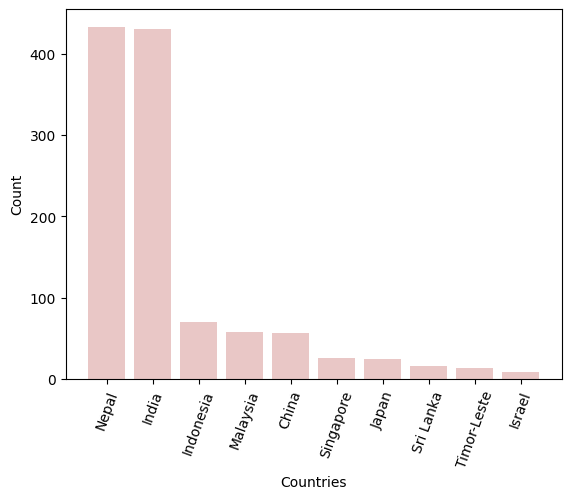

In [25]:
plt.bar(top10_countries['country'], top10_countries['count'], color = '#E9C7C6')
plt.xlabel("Countries")
plt.xticks(rotation=70, horizontalalignment="center")
plt.ylabel("Count")
plt.show()

In [14]:
# Vectorize 'Description' column using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
description_vectors = tfidf.fit_transform(combined_df['description']).toarray()


In [15]:

# One-hot encode 'Category'
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(combined_df[['category']]).toarray()

In [16]:
# Combine Latitude, Longitude with encoded features and TF-IDF vectors
geo_features = combined_df[['latitude', 'longitude']].values
geo_weight = 0.5
desc_weight = 1.5
category_weight = 1.0

weighted_features = np.hstack((
    geo_features * geo_weight,
    category_encoded * category_weight,
    description_vectors * desc_weight
))


In [17]:
# Compute similarity between places
similarity_matrix = cosine_similarity(weighted_features)

In [18]:
# Get recommendations for a specific place (e.g., index 0)
place_index = 123
similar_places = np.argsort(-similarity_matrix[place_index])[1:6]  # Top 5 excluding itself
similar_places


array([100, 184, 189, 216, 136])

In [19]:
print(combined_df.iloc[similar_places])


              name                                        description  \
100         Dakmar               path going to Dakmar meditation cave   
184     Sadda Pind  Recreated Punjabi village with activities and ...   
189  Sentinel peak                 first ascent: john jackson in 1945   
216   crystal peak                                               peak   
136       Kalāttip                  It is a peak in kashmir hinalayas   

     longitude   latitude            category country  
100  77.057342  34.332248  Tourist Attraction   India  
184  74.812824  31.643733  Tourist Attraction   India  
189  75.133223  34.199445    Natural Landmark   India  
216  75.321665  34.223939    Natural Landmark   India  
136  75.464838  34.043221    Natural Landmark   India  


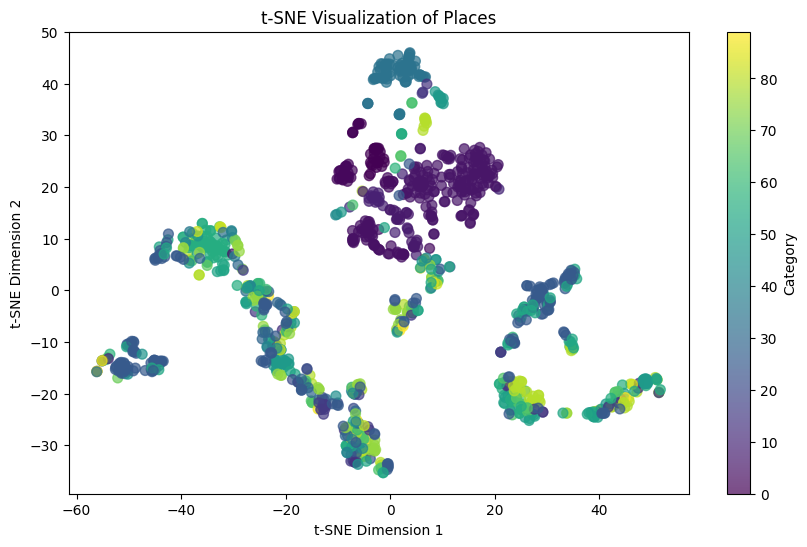

In [20]:

# Assuming 'features' contains your combined feature vectors
# Step 1: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_features = tsne.fit_transform(weighted_features)

# Step 2: Plot the reduced features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1],
                      c=combined_df['category'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)

# Add a legend (if categories are used)
plt.colorbar(scatter, label='Category')
plt.title('t-SNE Visualization of Places')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [21]:
combined_df.to_csv('Combined.csv')